## Importing necessary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


## Loading data into training and testing

In [2]:
myData = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = myData.load_data() 
#over here, X_train is a mutli-dimensional array having 60,000 images of 28x28 pixels. 60,000 2d matrices of 28x28 integer values
#y_train is a 1d array having digits between 0-9 (stores expected outputs)
#X_train[0] ->1st 2d matrix of 28x28 px

## Explaining the dataset 

In [3]:
X_train[0] #28x28 one image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train.shape #60000 28x28 images

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train #labels from 0 to 9 where final output would be displayed

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
y_train[0]

5

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape #10000 testing data

(10000,)

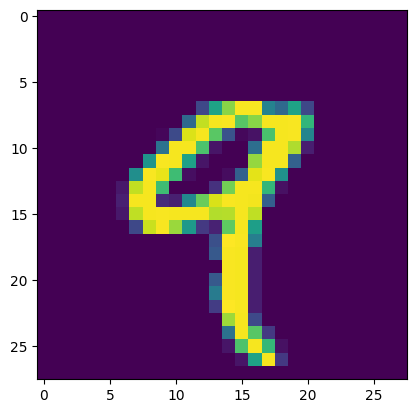

In [11]:
plt.imshow(X_train[4]) #checking and plotting index 4 training data which comes out to be number 9
plt.show()

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
len(X_train)

60000

## Creating 1D array for training and testing data

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [16]:
X_train_flattened[0].shape


(784,)

In [17]:
X_train.shape[1]

28

In [18]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Layerwise neural network has been formed

In [19]:
model = Sequential([
    Dense(1000, activation='relu', kernel_initializer='he_normal', input_shape = (784,)),  # First dense layer with 1000 neurons
    Dense(100, activation='relu', kernel_initializer='he_normal'),   # Second dense layer with 100 neurons
    Dense(10, activation='softmax')                                 # Output layer with 10 neurons
])
opt = Adam(learning_rate = 0.01) #Adam optimiser
model.compile(optimizer = opt, loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])#(SCC is used as labels are provided as integers
#instead of one-hot rep in which we can use CC)

C:\Users\nv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Fitting the training data

In [ ]:
model.fit(X_train_flattened, y_train, epochs=6, batch_size = 32, validation_split=0.2,verbose = 1) #verbose=0:nothing shown; default: verbose=1:animated progress bar; verbose=2: will
#just mention the number of epochs like this

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1391 - loss: 27.3926 - val_accuracy: 0.0998 - val_loss: 2.3026
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1121 - loss: 2.3021 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 3/6
 111/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1146 - loss: 2.2992

In [69]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9530 - loss: 0.2303


[0.19487373530864716, 0.9584000110626221]

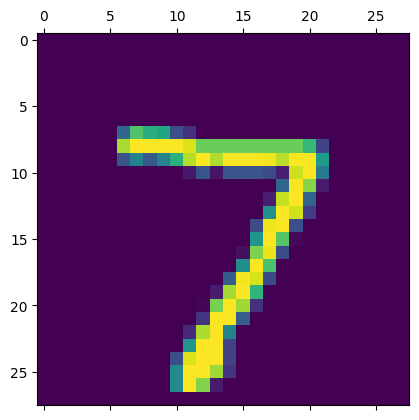

In [45]:
plt.matshow(X_test[0])

In [32]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
import numpy as np
np.argmax(y_pred[0])

7

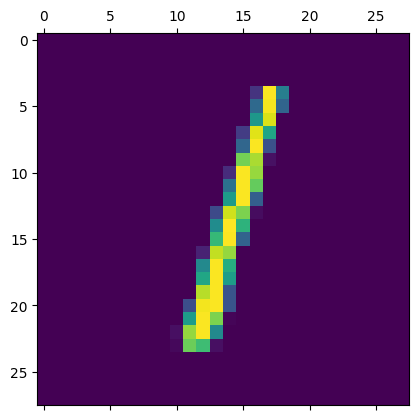

In [34]:
plt.matshow(X_test[2])

In [52]:
np.argmax(y_pred[2])

1

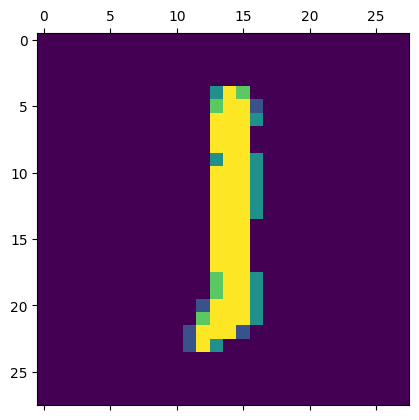

In [35]:
plt.matshow(X_test[14])

In [36]:
np.argmax(y_pred[14])

1

In [37]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test)
print("Test accuracy: ",test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.8221 - loss: 2764.8188
Test accuracy:  0.826200008392334
